In [1]:
#import libraries
import numpy as np
from ase.io import read, write
from ase import Atoms
import torch
import yaml
import json
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import re
os.makedirs('img_res', exist_ok=True) #creates a folder to store the loss graphs
os.makedirs('test_res', exist_ok=True) #creates a folder to store the files of the testing of the model
import functions as f #import functions used in this notebook

In [3]:
model_name = 'MACE-matpes-pbe-omat-ft'
device = 'cpu'

In [4]:
#the model can be evaluated using this
from mace.cli.eval_configs import main as mace_eval_configs_main
import sys

def eval_mace(model, configs, output, device=device):
    sys.argv=['program', '--configs', configs, '--model', model, '--output', output, '--device', device]
    mace_eval_configs_main()

In [5]:
#Evaluating the foundation model on the test and training sets
#evaluating the set on both the training and test datasets
eval_mace(model=f'{model_name}.model',
          configs='train_01.xyz',
          output=f'test_res/{model_name}_train.xyz')

eval_mace(model=f'{model_name}.model',
          configs='test_01.xyz',
          output=f'test_res/{model_name}_test.xyz')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mace/cli/eval_configs.py:140: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  model = torch.load(f=args.model, map_location=args.device)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mace/cli/eval_configs.py:140: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  model = torch.load(f=args.model, map_location=args.device)


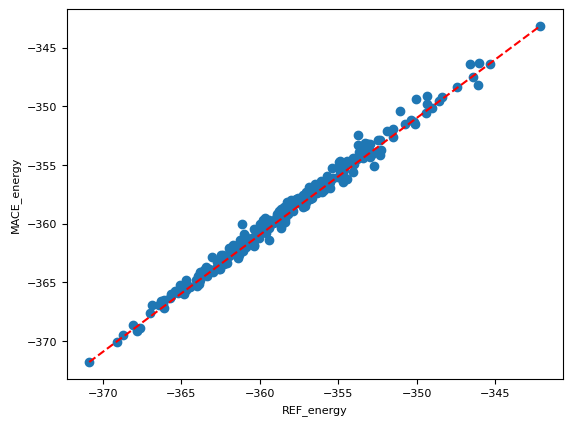

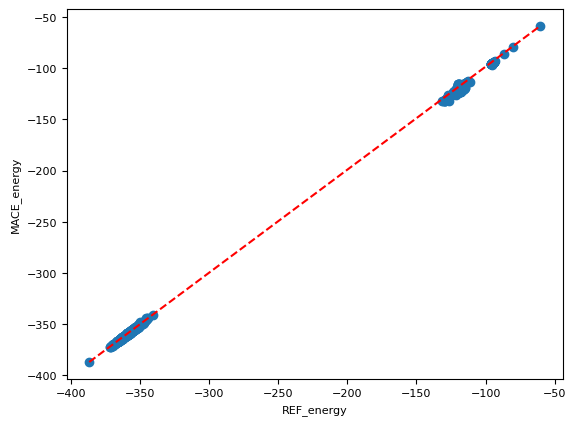

In [6]:
#from ase.io import read
test_df = f.eval_read(model_name, 'test')
train_df = f.eval_read(model_name, 'train')
train_df = train_df[3:]
test_df1 = test_df[['n_atoms', 'REF_energy', 'MACE_energy', 'REF_e/atom_meV', 'MACE_e/atom_meV']].copy()
train_df1 = train_df[['n_atoms', 'REF_energy', 'MACE_energy', 'REF_e/atom_meV', 'MACE_e/atom_meV']].copy()
f.plot_energy_comparison(test_df, 'REF_energy', 'MACE_energy')
f.plot_energy_comparison(train_df, 'REF_energy', 'MACE_energy')

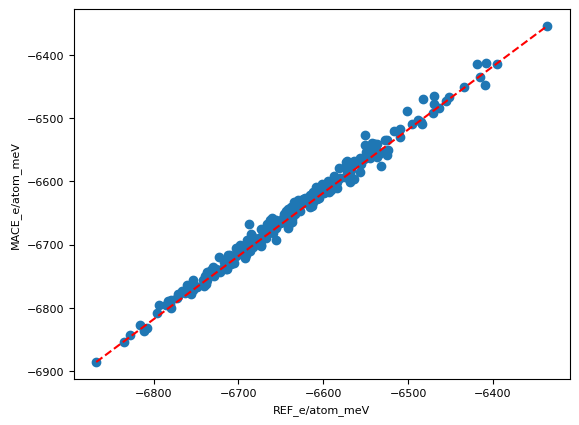

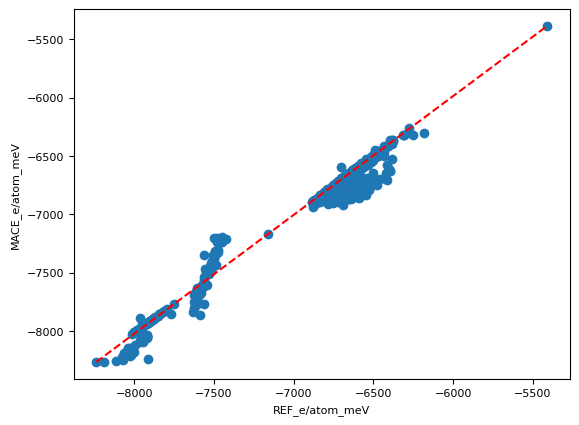

In [7]:
f.plot_energy_comparison(test_df, 'REF_e/atom_meV', 'MACE_e/atom_meV')
f.plot_energy_comparison(train_df, 'REF_e/atom_meV', 'MACE_e/atom_meV')

In [8]:
test_error = f.errors(test_df, 'test')
train_error = f.errors(train_df, 'train')
errors = pd.concat([test_error, train_error])
errors

,error,rmse,mae,r2
0,test,16.014917,13.800508,0.969169
0,train,72.244168,41.265149,0.972642
